```
Generative AI with Python, by Fernando Amaral
```

# Setup

In [1]:
!pip install transformers

In [2]:
from transformers import BlenderbotTokenizer, BlenderbotForConditionalGeneration
import torch

# Diagram

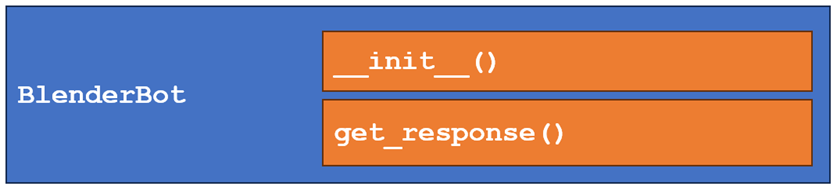

# Code

In [3]:
class BlenderBot:
    def __init__(self, model_name="facebook/blenderbot-400M-distill"):
        self.tokenizer = BlenderbotTokenizer.from_pretrained(model_name)
        self.model = BlenderbotForConditionalGeneration.from_pretrained(model_name)
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.model.to(self.device)

    def get_response(self, user_input):
        input_ids = self.tokenizer([user_input], return_tensors="pt", truncation=True, max_length=512).input_ids.to(self.device)
        with torch.no_grad():
            response_ids = self.model.generate(input_ids, max_length=512, num_return_sequences=1)
        response = self.tokenizer.decode(response_ids[0], skip_special_tokens=True)

        return response

In [4]:
def chat_with_bot():
    bot = BlenderBot()

    print("Bot: Hi! How can I assist you today?")
    while True:
        user_input = input("You: ")

        if user_input.lower() in ["quit", "exit", "bye"]:
            print("Bot: Goodbye!")
            break

        bot_response = bot.get_response(user_input)
        print(f"Bot: {bot_response}")

# Execution

In [5]:
chat_with_bot()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/127k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/62.9k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/16.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/310k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/730M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

Bot: Hi! How can I assist you today?
You: hello how are you
Bot:  I'm doing well. How are you? What do you like to do in your free time?
You: singing you?
Bot:  No, I'm not a singer, but I do enjoy singing in the shower.
You: exit
Bot: Goodbye!
